Topik
---
Analisis Pola Perjalanan Penumpang Transjakarta Berdasarkan Data Transaksi Elektronik untuk Peningkatan Efisiensi dan Kualitas Layanan

Latar Belakang

---

Transjakarta sebagai penyedia layanan Bus Rapid Transit (BRT) terbesar di dunia mencatat jutaan perjalanan setiap bulannya. Dengan basis data transaksi elektronik, setiap aktivitas penumpang—mulai dari tap-in, tap-out, koridor perjalanan, halte, waktu perjalanan, hingga jumlah pembayaran—dapat dianalisis secara komprehensif.

Data ini menjadi sumber berharga untuk memahami perilaku pengguna: halte mana yang paling ramai, jam sibuk perjalanan, durasi rata-rata perjalanan, perbedaan perilaku antara hari kerja dan akhir pekan, hingga perbedaan pola antar koridor.

Analisis berbasis data ini diharapkan memberikan gambaran nyata mengenai pola perjalanan penumpang, yang dapat dimanfaatkan Transjakarta untuk meningkatkan efisiensi operasional (penempatan armada, penjadwalan bus), optimalisasi biaya (subsidi & tarif), serta peningkatan kenyamanan dan kepuasan pengguna.

Rumusan Masalah

---

1. Pola Waktu Perjalanan
  *  Bagaimana distribusi perjalanan berdasakran jam dan hari
  * Apakah terdapat perbedaan rata-rata durasi perjalanan antar hari kerja dan akhir pekan?

2. Pola Halte & Korridor
  * Halte mana yang paling sering digunakan untuk TapIn
  * Apakah terdapat perbedaan rata-rata durasi perjalanan antar koridor Transjakarta?

3. Karakteristik Penumpang
 * Apakah terdapat hubungan antara jenis kelamin dengan penggunaan halte populer?
 * Apakah usia penumpang berhubungan dengan frekuensi perjalanan?

4. Aspek Finansial & Efisiensi Biaya
  * Apakah terdapat perbedaan rata-rata biaya perjalanan antar koridor?
  * Bagaimana distribusi perjalanan gratis vs berbayar, dan implikasinya terhadap pendapatan Transjakarta?

5. Integrasi Rute & Armada
  * Koridor mana yang berpotensi overcrowded
  * Apakah pola perjalanan berbeda signifikan antara arah Go dan Back

#Library

In [ ]:
import pandas as pd
from datetime import datetime
import numpy as np
import folium
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import ttest_ind, f_oneway, chi2_contingency, pearsonr, spearmanr

#Data Preview

In [ ]:
df = pd.read_csv('/content/Transjakarta.csv')
df

,transID,payCardID,payCardBank,payCardName,payCardSex,payCardBirthDate,corridorID,corridorName,direction,tapInStops,...,tapInStopsLon,stopStartSeq,tapInTime,tapOutStops,tapOutStopsName,tapOutStopsLat,tapOutStopsLon,stopEndSeq,tapOutTime,payAmount
0,EIIW227B8L34VB,180062659848800,emoney,Bajragin Usada,M,2008,5,Matraman Baru - Ancol,1.0,P00142,...,106.84402,7,2023-04-03 05:21:44,P00253,Tegalan,-6.203101,106.85715,12.0,2023-04-03 06:00:53,3500.0
1,LGXO740D2N47GZ,4885331907664776,dki,Gandi Widodo,F,1997,6C,Stasiun Tebet - Karet via Patra Kuningan,0.0,B01963P,...,106.83302,13,2023-04-03 05:42:44,B03307P,Sampoerna Strategic,-6.217152,106.81892,21.0,2023-04-03 06:40:01,3500.0
2,DJWR385V2U57TO,4996225095064169,dki,Emong Wastuti,F,1992,R1A,Pantai Maju - Kota,0.0,B00499P,...,106.81435,38,2023-04-03 05:59:06,B04962P,Simpang Kunir Kemukus,-6.133731,106.81475,39.0,2023-04-03 06:50:55,3500.0
3,JTUZ800U7C86EH,639099174703,flazz,Surya Wacana,F,1978,11D,Pulo Gebang - Pulo Gadung 2 via PIK,0.0,B05587P,...,106.93526,23,2023-04-03 05:44:51,B03090P,Raya Penggilingan,-6.183068,106.93194,29.0,2023-04-03 06:28:16,3500.0
4,VMLO535V7F95NJ,570928206772,flazz,Embuh Mardhiyah,M,1982,12,Tanjung Priok - Pluit,0.0,P00239,...,106.88900,5,2023-04-03 06:17:35,P00098,Kali Besar Barat,-6.135355,106.81143,15.0,2023-04-03 06:57:03,3500.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37895,ZWEC949B8Q87QG,4685818286724028395,brizzi,Kamila Mahendra,F,2004,6B,Ragunan - MH Thamrin via Semanggi,1.0,P00261,...,106.82309,2,2023-04-21 18:18:37,P00228,SMK 57,-6.290967,106.82365,13.0,2023-04-21 19:55:49,3500.0
37896,YHHK837P6Y95GN,6502902290603767,dki,Titi Siregar,M,1974,9N,Pinang Ranti - Pramuka,1.0,P00064,...,106.88116,1,2023-04-18 21:52:31,P00179,Pinang Ranti,-6.291075,106.88634,2.0,2023-04-18 22:28:22,3500.0
37897,YXPP627N4G95HO,213159426675861,emoney,drg. Zahra Nashiruddin,F,1976,1T,Cibubur - Balai Kota,1.0,B02873P,...,106.81676,12,2023-04-04 10:29:47,B00226P,Buperta Cibubur,-6.370321,106.89628,14.0,2023-04-04 13:27:25,20000.0
37898,RGVK175U2U98UV,377840859133591,emoney,Ana Agustina,M,1976,JAK.13,Tanah Abang - Jembatan Lima,1.0,B02505P,...,106.80954,33,2023-04-15 19:59:26,B01787P,JPO Blok G,-6.188861,106.81135,34.0,2023-04-15 20:27:50,0.0


##Quick Check

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37900 entries, 0 to 37899
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   transID           37900 non-null  object 
 1   payCardID         37900 non-null  int64  
 2   payCardBank       37900 non-null  object 
 3   payCardName       37900 non-null  object 
 4   payCardSex        37900 non-null  object 
 5   payCardBirthDate  37900 non-null  int64  
 6   corridorID        36643 non-null  object 
 7   corridorName      35970 non-null  object 
 8   direction         37900 non-null  float64
 9   tapInStops        36687 non-null  object 
 10  tapInStopsName    37900 non-null  object 
 11  tapInStopsLat     37900 non-null  float64
 12  tapInStopsLon     37900 non-null  float64
 13  stopStartSeq      37900 non-null  int64  
 14  tapInTime         37900 non-null  object 
 15  tapOutStops       35611 non-null  object 
 16  tapOutStopsName   36556 non-null  object

Data Transjakarta memiliki 20 kolom dengan 37.900 baris

In [ ]:
df.describe()

,payCardID,payCardBirthDate,direction,tapInStopsLat,tapInStopsLon,stopStartSeq,tapOutStopsLat,tapOutStopsLon,stopEndSeq,payAmount
count,3.790000e+04,37900.000000,37900.000000,37900.000000,37900.000000,37900.000000,36556.000000,36556.000000,36556.000000,36893.000000
mean,4.250060e+17,1990.089314,0.500633,-6.214838,106.841554,13.572480,-6.214651,106.841233,21.219909,2699.712683
std,1.321699e+18,13.051482,0.500006,0.057911,0.060369,12.237623,0.059022,0.060999,13.800689,4212.225592
min,6.040368e+10,1946.000000,0.000000,-6.394973,106.614730,0.000000,-6.394973,106.614730,1.000000,0.000000
25%,1.800442e+14,1982.000000,0.000000,-6.245863,106.803470,4.000000,-6.247225,106.801750,11.000000,0.000000
50%,3.507947e+15,1990.000000,1.000000,-6.214587,106.834830,10.000000,-6.214718,106.834580,18.000000,3500.000000
75%,4.699023e+15,2001.000000,1.000000,-6.175528,106.882270,19.000000,-6.174736,106.883030,29.000000,3500.000000
max,4.997694e+18,2012.000000,1.000000,-6.089429,107.023950,68.000000,-6.091746,107.023660,77.000000,20000.000000


#Data Cleaning & Preparation

##Cek Duplikat

In [ ]:
df.duplicated().sum()

np.int64(0)

##Drop null values

In [ ]:
df.dropna(inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 31730 entries, 0 to 37899
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   transID           31730 non-null  object 
 1   payCardID         31730 non-null  int64  
 2   payCardBank       31730 non-null  object 
 3   payCardName       31730 non-null  object 
 4   payCardSex        31730 non-null  object 
 5   payCardBirthDate  31730 non-null  int64  
 6   corridorID        31730 non-null  object 
 7   corridorName      31730 non-null  object 
 8   direction         31730 non-null  float64
 9   tapInStops        31730 non-null  object 
 10  tapInStopsName    31730 non-null  object 
 11  tapInStopsLat     31730 non-null  float64
 12  tapInStopsLon     31730 non-null  float64
 13  stopStartSeq      31730 non-null  int64  
 14  tapInTime         31730 non-null  object 
 15  tapOutStops       31730 non-null  object 
 16  tapOutStopsName   31730 non-null  object 
 17

##Convert Kolom TapIn TapOut ke Datetime

In [ ]:
print("=== Sebelum Convert Datetime ===")
print(df[["tapInTime", "tapOutTime"]].info())

df["tapInTime"] = pd.to_datetime(df["tapInTime"], errors="coerce")
df["tapOutTime"] = pd.to_datetime(df["tapOutTime"], errors="coerce")

print("\n=== Setelah Convert Datetime ===")
print(df[["tapInTime", "tapOutTime"]].info())

=== Sebelum Convert Datetime ===
<class 'pandas.core.frame.DataFrame'>
Index: 31730 entries, 0 to 37899
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   tapInTime   31730 non-null  object
 1   tapOutTime  31730 non-null  object
dtypes: object(2)
memory usage: 743.7+ KB
None

=== Setelah Convert Datetime ===
<class 'pandas.core.frame.DataFrame'>
Index: 31730 entries, 0 to 37899
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   tapInTime   31730 non-null  datetime64[ns]
 1   tapOutTime  31730 non-null  datetime64[ns]
dtypes: datetime64[ns](2)
memory usage: 743.7 KB
None


Kodingan ini bertujuan untuk mengubah tipe data kolom TapIn TapOut dari object (string) menjadi datetime --> Hal ini bertujuan agar data waktu dapat diproses secara numerik.

##Menghitung duration perjalanan (dalam menit)

In [ ]:
print("\n=== Sebelum Hitung Duration ===")
print(df[["tapInTime", "tapOutTime"]].head())

df["duration_min"] = (df["tapOutTime"] - df["tapInTime"]).dt.total_seconds() / 60

print("\n=== Setelah Hitung Duration ===")
print(df[["tapInTime", "tapOutTime", "duration_min"]].head())


=== Sebelum Hitung Duration ===
            tapInTime          tapOutTime
0 2023-04-03 05:21:44 2023-04-03 06:00:53
1 2023-04-03 05:42:44 2023-04-03 06:40:01
2 2023-04-03 05:59:06 2023-04-03 06:50:55
3 2023-04-03 05:44:51 2023-04-03 06:28:16
4 2023-04-03 06:17:35 2023-04-03 06:57:03

=== Setelah Hitung Duration ===
            tapInTime          tapOutTime  duration_min
0 2023-04-03 05:21:44 2023-04-03 06:00:53     39.150000
1 2023-04-03 05:42:44 2023-04-03 06:40:01     57.283333
2 2023-04-03 05:59:06 2023-04-03 06:50:55     51.816667
3 2023-04-03 05:44:51 2023-04-03 06:28:16     43.416667
4 2023-04-03 06:17:35 2023-04-03 06:57:03     39.466667


Kodingan ini bertujuan untuk menambah perhitungan duration dalam satuan waktu menit. Setelah ditambahkan kolom duration_min, setiap baris kini menunjukkan lama perjalanan dalam menit, hasil dari selisih antara waktu masuk dan keluar.

##Mengambil day & hour

In [ ]:
print("\n=== Sebelum Extract Day & Hour ===")
print(df[["tapInTime"]].head())

df["day_of_week"] = df["tapInTime"].dt.day_name()
df["hour"] = df["tapInTime"].dt.hour
df["is_weekend"] = df["day_of_week"].isin(["Saturday", "Sunday"]).astype(int)

print("\n=== Setelah Extract Day & Hour ===")
print(df[["tapInTime", "day_of_week", "hour", "is_weekend"]].head())


=== Sebelum Extract Day & Hour ===
            tapInTime
0 2023-04-03 05:21:44
1 2023-04-03 05:42:44
2 2023-04-03 05:59:06
3 2023-04-03 05:44:51
4 2023-04-03 06:17:35

=== Setelah Extract Day & Hour ===
            tapInTime day_of_week  hour  is_weekend
0 2023-04-03 05:21:44      Monday     5           0
1 2023-04-03 05:42:44      Monday     5           0
2 2023-04-03 05:59:06      Monday     5           0
3 2023-04-03 05:44:51      Monday     5           0
4 2023-04-03 06:17:35      Monday     6           0


Kodingan ini bertujuan untuk menambahkan fitur baru di Day & Hour. Setiap entri kini memiliki day_of_week (hari), hour (jam), dan is_weekend (indikator akhir pekan), sehingga analisis pola perjalanan berdasarkan waktu menjadi lebih mudah.

##Ekstrak Fitur Age

In [ ]:
df['payCardBirthDate']

,payCardBirthDate
0,2008
1,1997
2,1992
3,1978
4,1982
...,...
37895,2004
37896,1974
37897,1976
37898,1976


In [ ]:
current_year = datetime.now().year

df["age"] = current_year - df["payCardBirthDate"]

print(df["age"].head())

0    17
1    28
2    33
3    47
4    43
Name: age, dtype: int64


Kodingan ini bertujuan untuk mengekstrak umur agar bisa dilakukan segmentasi pelanggan berdasarkan umur

#Analysis

##Distribusi Perjalanan

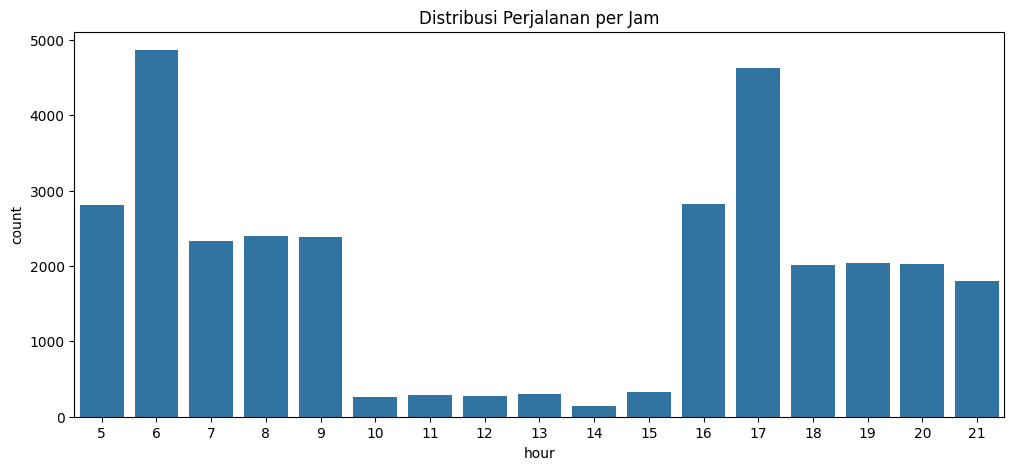

In [ ]:
#Distribusi perjalanan per jam
plt.figure(figsize=(12,5))
sns.countplot(data=df, x='hour')
plt.title("Distribusi Perjalanan per Jam")
plt.show()

1. Jam Sibuk Pagi (5-9)
  * Terlihat lonjakan sangat tinggi pada jam 6 pagi (puncak ~4900 perjalanan)
  * Setelah jam 6, jumalh perjalanan menurun tapi masih cukup tinggi sampai jam 9
  * Menunjukkan penumpang (pekerja & pelajar) yang berangkat ke kantor/sekolah  
2. Jam Sepi (10-15)
  * Hampir tidak ada perjalanan antara jam 10-15 siang
  * Ini wajar karena di luar jam berangkat/sekolah, sehingga lebih sepi
3. Jam Sibuk Sore (16-18)
  * Ada lonjakan besar lagi di jam 17 sore (~4700 perjalanan), mirip dengan pagi
  * Menandakan arus pulang kerja
4. Jam Malam (19-21)
  * Setelah jam sibuk sore, masih ada perjalanan cukup stabil (2000-2100) sampai jam 20-21
  * Bisa terjadi karena penumpang yang pulang lebih malam atau aktivitas lain

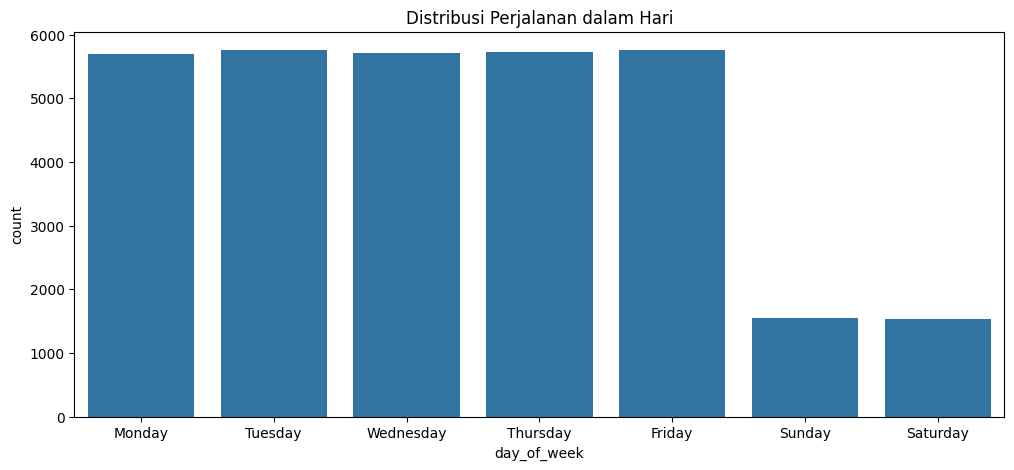

In [ ]:
#Distribusi perjalanan dalam hari
plt.figure(figsize=(12,5))
sns.countplot(data=df, x='day_of_week')
plt.title("Distribusi Perjalanan dalam Hari")
plt.show()

1. Perjalanan tinggi dari Senin-Jumat dengan kisaran ~5000-6000 perjalanan per hari. Menunjukkan bahwa hari kerja memiliki penumpang yang lebih banyak
2. Perjalanan rendah pada Sabtu-Minggu dengan kisaran ~100-1500 Perjalanan. Menunjukkan pola perjalanan yang lebih rendah di weekend, ketika banyak orang tidak bekerja

* H0: Tidak ada perbedaan durasi perjalanan antara hari kerja dan akhir pekan
* H1: Ada perbedaan durasi perjalanan antara hari kerja dan akhir pekan

In [ ]:
#T-Test Durasi Weekday vs Weeknd
weekday_dur = df[df['is_weekend']==False]['duration_min']
weekend_dur = df[df['is_weekend']==True]['duration_min']
t_stat, p_val = stats.ttest_ind(weekday_dur, weekend_dur)

# Menentukan hipotesis
if p_val < 0.05:
    print("H0 ditolak: Ada perbedaan durasi perjalanan antara hari kerja dan akhir pekan.")
else:
    print("H0 gagal ditolak: Tidak ada perbedaan durasi perjalanan antara hari kerja dan akhir pekan.")

# Menampilkan nilai t-statistic dan p-value untuk referensi
print(f"T-Statistic: {t_stat}, P-Value: {p_val}")

H0 ditolak: Ada perbedaan durasi perjalanan antara hari kerja dan akhir pekan.
T-Statistic: 3.522029000096869, P-Value: 0.00042885851910861363


1. T-Test = 3.522: Nilai ini menunjukkan bahwa ada perbedaan yang cukup besar antara dutasi perjalanan pada hari kerja dan akhir pekan
2. P-Value = 0.00043: Nilai p-value < 0.05 menunjukkan bahwa perbedaan durasi perjalanan antara hari kerja dan akhir pekan adalah signifikan secara statistik.
3. H0 ditolak --> ada perbedaan yang signifikan secara statistik antara rata-rata durasi perjalanan di hari kerja dan akhir pekan. Durasi perjalanan pada hari kerja cenderung berbeda secara signifikan dibandingkan dengan akhir pekan

##Persebaran Halte Tap-In & Tap-Out

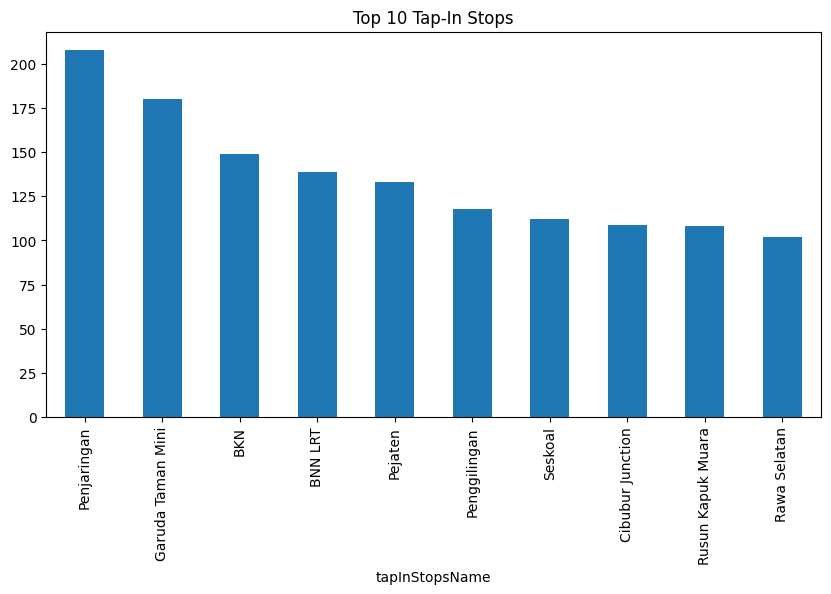

In [ ]:
#Top 10 Halte Tap-In
plt.figure(figsize=(10,5))
df["tapInStopsName"].value_counts().head(10).plot(kind="bar")
plt.title("Top 10 Tap-In Stops")
plt.show()

1. Penjaringan adalah stasiun dengan tap-in terbanyak (lebih dari 200), menunjukkan kawasan ini memiliki volume penumpang yang tinggi
2. Garuda Taman Mini dan BKN juga masuk dalam daftar teratas, menunjukkan kawasan padat atau akses yang baik
3. Stasiun ini kemungkinan terhubung dengan moda transportasi lain, meningkatkan jumlah pengguna
4. Titik tap-in terbanyak mencerminkan jalur utama ata kawasan yang banyak diminati oleh penumpang

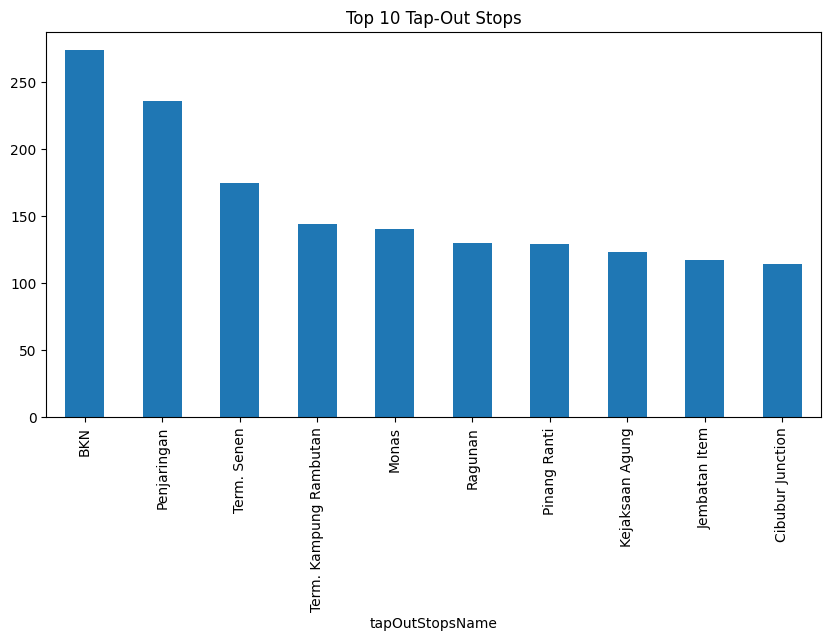

In [ ]:
#Top 10 Halte Tap-Out
plt.figure(figsize=(10,5))
df["tapOutStopsName"].value_counts().head(10).plot(kind="bar")
plt.title("Top 10 Tap-Out Stops")
plt.show()

1. BKN memiliki jumlah tap-out terbanyak, lebih dari 250, menunjukkan destinasi utama bagi penumpang
2. Penjaringan juga muncul dengan jumlah tap-out tinggi, menunjukkan stasiun ini juga sering digunakan sebagai titik kedatangan
3. Tem. Senen, Monas, dan Ragunan menjadi lokasi populer untuk keluar dari Transjakarta dengan fungsi sebagai pusat bisnis, wisata, atau aktivitas hari-hari

In [ ]:
#Ambil top 10 halte populer
top_stops = df['tapInStopsName'].value_counts().head(10).index
geo_data = df[df['tapInStopsName'].isin(top_stops)].drop_duplicates('tapInStops')

#Buat peta
m = folium.Map(location=[-6.2, 106.8], zoom_start=11)

for _, row in geo_data.iterrows():
    folium.CircleMarker(
        location=[row['tapInStopsLat'], row['tapInStopsLon']],
        radius=7,
        popup=f"{row['tapInStopsName']}",
        color="blue",
        fill=True,
        fill_color="blue"
    ).add_to(m)

m.save("map_tapin_halte_populer.html")

In [ ]:
#Ambil top 10 halte populer
top_stops = df['tapOutStopsName'].value_counts().head(10).index
geo_data = df[df['tapOutStopsName'].isin(top_stops)].drop_duplicates('tapOutStops')

#Buat peta
m = folium.Map(location=[-6.2, 106.8], zoom_start=11)

for _, row in geo_data.iterrows():
    folium.CircleMarker(
        location=[row['tapOutStopsLat'], row['tapOutStopsLon']],
        radius=7,
        popup=f"{row['tapOutStopsName']}",
        color="blue",
        fill=True,
        fill_color="blue"
    ).add_to(m)

m.save("map_out_halte_populer.html")

Pembuatan map via folium dapat memudahkan interpretasi dari persebaran top halte Tap-In dan top halte Tap-Out

* Dalam map terlihat bahwa bus awal dan bus akhir paling banyak berada di pinggiran kota yang menuju ke arah tengah kota. Ini menandakan bahwa banyaknya demand dari-dan-ke kota dan perbatasan kota

##Durasi Antar Top 10 Tap-In Tap-Out

In [ ]:
#Ambil top 10 halte tap-in dan tap-out
top10_tapin = df['tapInStopsName'].value_counts().head(10).index
top10_tapout = df['tapOutStopsName'].value_counts().head(10).index

#Filter perjalanan hanya untuk halte populer
df_popular = df[(df['tapInStopsName'].isin(top10_tapin)) &
                (df['tapOutStopsName'].isin(top10_tapout))]

#Hitung rata-rata durasi per kombinasi tapIn - tapOut
avg_duration = (df_popular.groupby(['tapInStopsName', 'tapOutStopsName'])['duration_min']
                .mean()
                .reset_index()
                .sort_values('duration_min', ascending=False))

#Lihat hasil
print(avg_duration.head(20))

      tapInStopsName   tapOutStopsName  duration_min
1                BKN      Pinang Ranti     81.894595
5  Garuda Taman Mini      Pinang Ranti     73.650235
3   Cibubur Junction               BKN     73.287333
6            Pejaten           Ragunan     67.690000
0                BKN  Cibubur Junction     65.360185
8  Rusun Kapuk Muara       Penjaringan     62.718056
4  Garuda Taman Mini               BKN     61.088406
7       Rawa Selatan             Monas     38.596667
2            BNN LRT      Pinang Ranti     28.333333


Mengambil 10 rute dengan durasi perjalanan terlama agar bisa dianalisis dan divisualisasikan

/tmp/ipython-input-2568829448.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=longest_routes, x='duration_min', y='rute', palette='viridis')


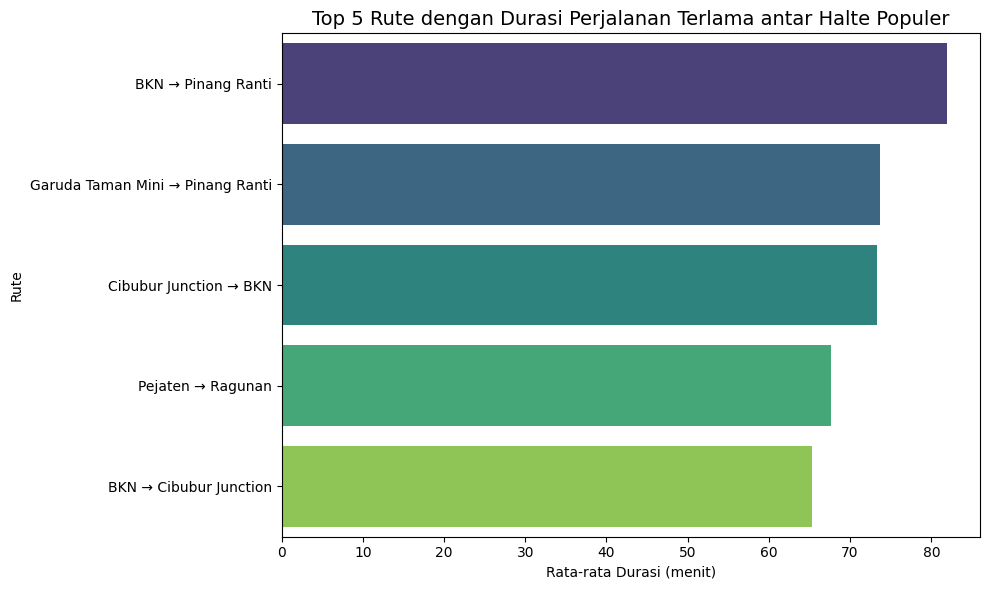

In [ ]:
#Menghitung rata-rata durasi per rute
avg_duration = (df_popular.groupby(['tapInStopsName', 'tapOutStopsName'])['duration_min']
                .mean()
                .reset_index())

#Filter menjadi 5 rute terlama
longest_routes = avg_duration.nlargest(5, 'duration_min')

#Membuat ylabel
longest_routes['rute'] = longest_routes['tapInStopsName'] + " → " + longest_routes['tapOutStopsName']

#Top 5 Rute Terlama
plt.figure(figsize=(10, 6))
sns.barplot(data=longest_routes, x='duration_min', y='rute', palette='viridis')
plt.title("Top 5 Rute dengan Durasi Perjalanan Terlama antar Halte Populer", fontsize=14)
plt.xlabel("Rata-rata Durasi (menit)")
plt.ylabel("Rute")
plt.tight_layout()
plt.show()

* Halte paling lama dimulai dari BKN dan berakhir di Pinang Ranti, dengan durasi selama 81 menit, untuk di halte ini bisa dikaji ulang apakah terdapat rute yang lebih singkat dan lebih cepat

Top 5 Most Frequent Corridors: ['Cibubur - Balai Kota', 'Ciputat - CSW', 'Harmoni - Jakarta International Stadium', 'Pulo Gadung - Monas', 'Kampung Rambutan - Pondok Gede']


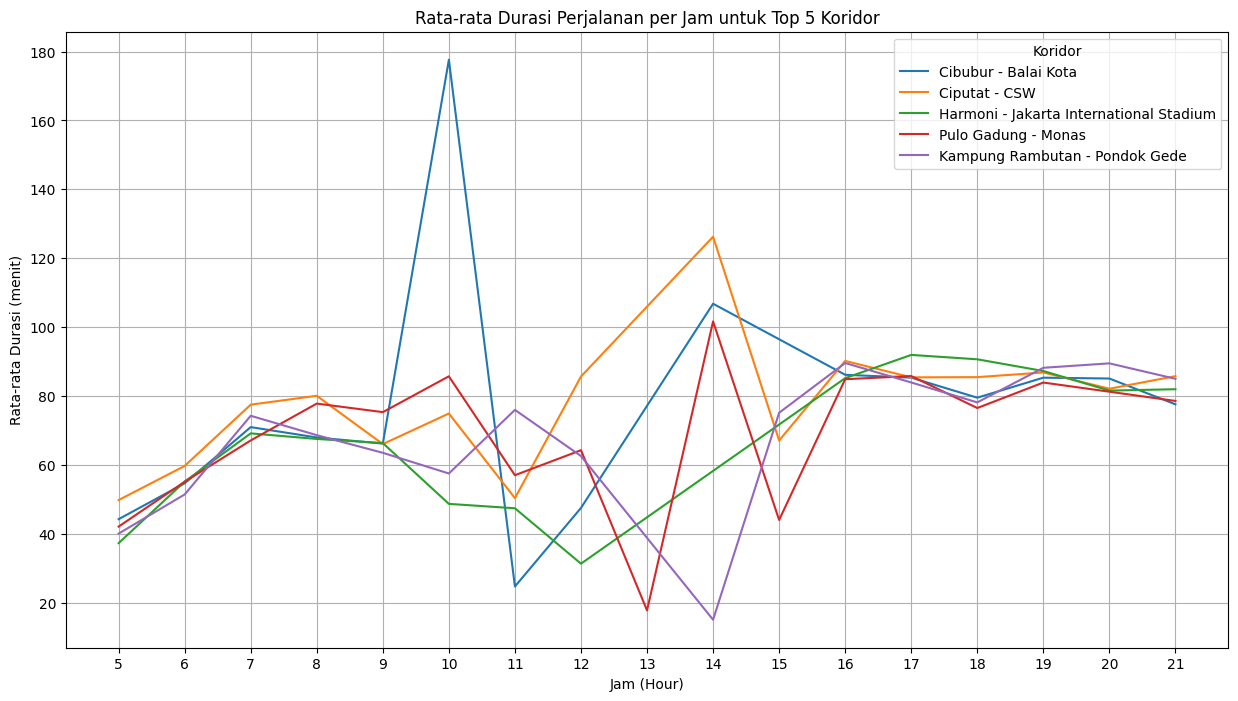

In [ ]:
#Mengambil 5 koridor yang paling sering digunakan
top_corridors = df['corridorName'].value_counts().head(5).index
print("Top 5 Most Frequent Corridors:", list(top_corridors))

#Rata-rata durasi per jam per untuk koridor yang paling sering digunakan
plt.figure(figsize=(15, 8))

#Mengitung rata-rata durasi perjalanan per koridor
for corridor in top_corridors:
    df_corridor = df[df['corridorName'] == corridor].copy()
    avg_duration_corridor_hour = df_corridor.groupby('hour')['duration_min'].mean().reset_index()
    sns.lineplot(data=avg_duration_corridor_hour, x='hour', y='duration_min', label=corridor)

plt.title("Rata-rata Durasi Perjalanan per Jam untuk Top 5 Koridor")
plt.xlabel("Jam (Hour)")
plt.ylabel("Rata-rata Durasi (menit)")
plt.xticks(range(df['hour'].min(), df['hour'].max() + 1))
plt.grid(True)
plt.legend(title="Koridor")
plt.show()

* Koridor paling lama berada di koridor Cibubur - Balai kota di jam 10 pagi dengan durasi hampir menyentuh 3 jam. Koridor ini menunjukkan lonjakan yang sangat tinggi dibandingkan dengan koridor lainnya

* H0: Tidak ada perbedaan durasi perjalanan antar koridor
* H1: Ada perbedaan durasi perjalanan antar koridor

In [ ]:
#ANOVA durasi antar koridor
anova_result = stats.f_oneway(*[group['duration_min'].dropna()
                                for name, group in df.groupby('corridorName')])

# Menentukan hipotesis
if anova_result.pvalue < 0.05:
    print("H0 ditolak: Ada perbedaan durasi perjalanan antar koridor.")
else:
    print("H0 gagal ditolak: Tidak ada perbedaan durasi perjalanan antar koridor.")

# Menampilkan nilai F-statistic dan p-value untuk referensi
print(f"F-Statistic: {anova_result.statistic}, P-Value: {anova_result.pvalue}")

H0 ditolak: Ada perbedaan durasi perjalanan antar koridor.
F-Statistic: 2.856245815815605, P-Value: 1.1283547868597271e-38


* F-Value: 2.856 --> Ada variasi antar koridor yang lebih besar daripada variasi dalam durasi di koridor tersebut.
* P-Value: 1.128xxxe-38 --> Sangat kecil bila dibandingkan dengan nilai alpha (0.05). Maka H0 ditolak --> ada perbedaan durasi perjalanan antar koridor dan perbedaannya signifikan

##Karakteristik Demografi Penumpang

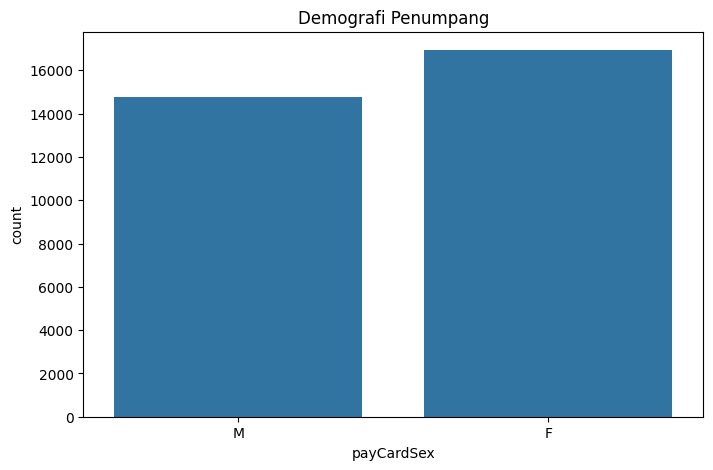

In [ ]:
#Menampilkan demografi penumpang
plt.figure(figsize=(8,5))
sns.countplot(data=df, x='payCardSex')
plt.title("Demografi Penumpang")
plt.show()

* Penumpang Transjakarta didominasi oleh Perempuan dengan jumlah ~16000. Sedangkan pria berjumlah ~14000-14200
* Menandakan perlunya fasilitas tambahan yang aman, dan nyaman bagi Perempuan (bus khusus perempuan)

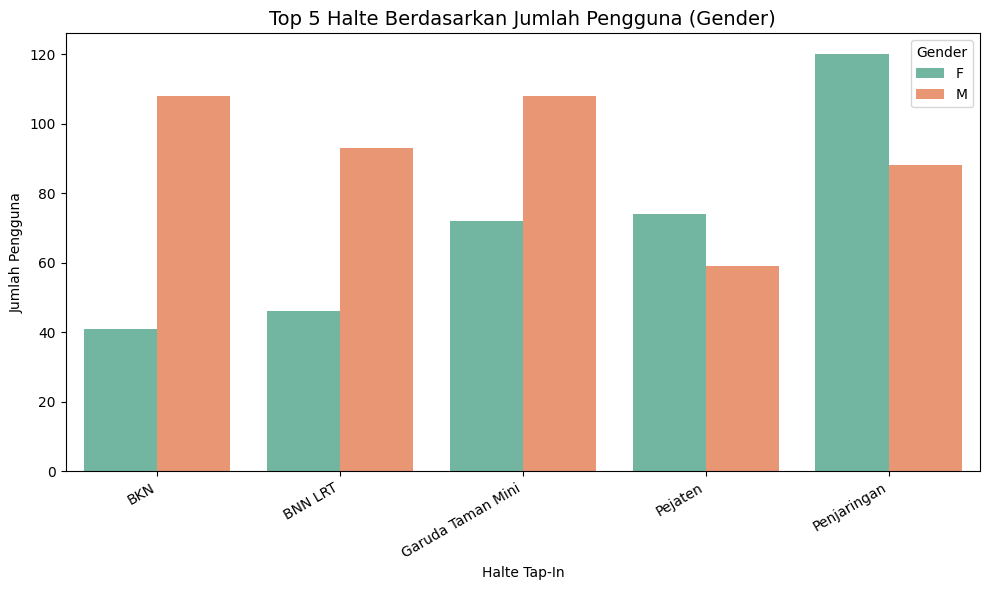

In [ ]:
#Ambil top 5 halte berdasarkan frekuensi tap-in
top5_stops = df['tapInStopsName'].value_counts().head(5).index

#Filter data hanya untuk halte top 5
df_top5 = df[df['tapInStopsName'].isin(top5_stops)]

#Hitung jumlah pengguna per halte per gender
stop_gender_counts = (
    df_top5.groupby(['tapInStopsName', 'payCardSex'])
    .size()
    .reset_index(name='count')
)

#4. Visualisasi
plt.figure(figsize=(10,6))
sns.barplot(
    data=stop_gender_counts,
    x='tapInStopsName',
    y='count',
    hue='payCardSex',
    palette='Set2'
)
plt.title("Top 5 Halte Berdasarkan Jumlah Pengguna (Gender)", fontsize=14)
plt.xlabel("Halte Tap-In")
plt.ylabel("Jumlah Pengguna")
plt.xticks(rotation=30, ha="right")
plt.legend(title="Gender")
plt.tight_layout()
plt.show()

* Beberapa halte yang paling sering digunakan (berdasarkan Tap-In) didominasi oleh penumpang Pria
* Halte (Tap-In) Penjaringan didominasi oleh Perempuan
* Fokuskan pengadaan bus khusus untuk Perempuan di Halte Penjaringan

/tmp/ipython-input-4046932134.py:12: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  tapout_top = tapout_dist.groupby('payCardSex').apply(


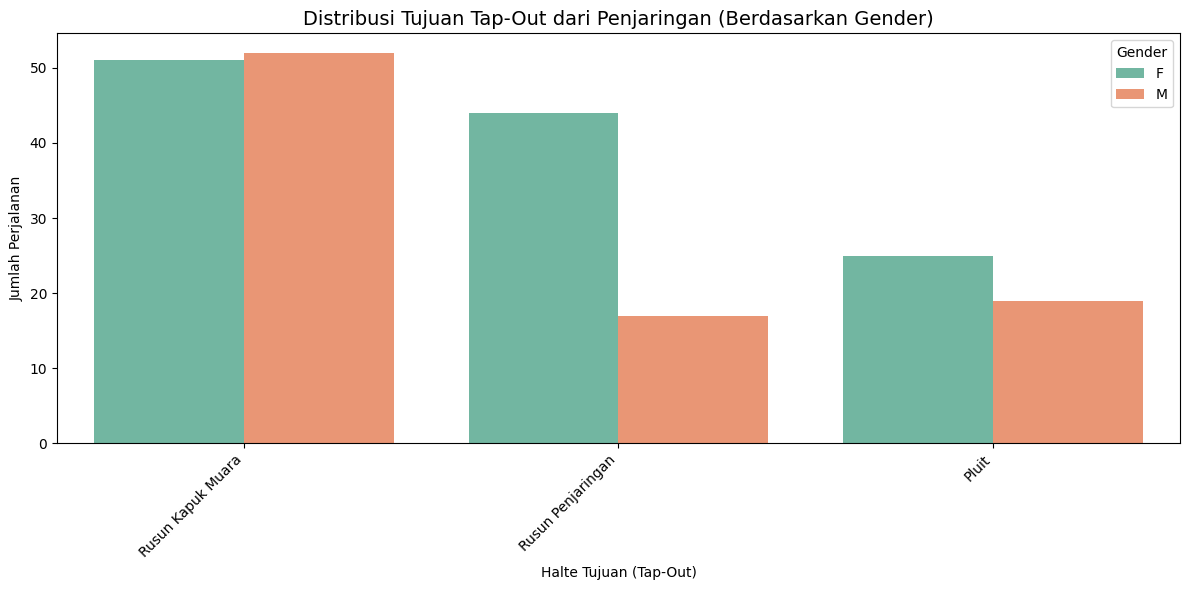

In [ ]:
#Filter data khusus tap-in di Penjaringan
df_penjaringan = df[df['tapInStopsName'] == "Penjaringan"]

#Hitung distribusi tap-out berdasarkan gender
tapout_dist = (
    df_penjaringan.groupby(['payCardSex', 'tapOutStopsName'])
    .size()
    .reset_index(name='count')
)

#Ambil top 10 tujuan per gender
tapout_top = tapout_dist.groupby('payCardSex').apply(
    lambda x: x.nlargest(10, 'count')
).reset_index(drop=True)

#Visualisasi
plt.figure(figsize=(12,6))
sns.barplot(
    data=tapout_top,
    x='tapOutStopsName',
    y='count',
    hue='payCardSex',
    palette='Set2'
)
plt.title("Distribusi Tujuan Tap-Out dari Penjaringan (Berdasarkan Gender)", fontsize=14)
plt.xlabel("Halte Tujuan (Tap-Out)")
plt.ylabel("Jumlah Perjalanan")
plt.xticks(rotation=45, ha="right")
plt.legend(title="Gender")
plt.tight_layout()
plt.show()

* Memfilter data Tap-In yang memiliki penumpang Perempuan paling banyak (berdasarkan grafik sebelumnya)
* Tracking tujuan akhir dari penjaringan agar bisa mendapatkan fokus utama rute untuk bus khusus perempuan
* Hampir semua tujuan akhir dari Penjaringan didominasi oleh Perempuan, menandakan mulai dari Halte Penjaringan sampai Halte tujuan akhir dibutuhkan bus khusus wanita yang lebih banyak agar menjamin kenyamanan dan keamanan bagi penumpang Perempuan

* H0: Tidak ada hubungan signifikan antara jenis kelamin dan halte populer
* H1: Ada hubungan yang signifikan antara jenis kelamin dan halte populer

In [ ]:
#Chi-Square: Gender vs Top 5 halte
top5_stops = df['tapInStopsName'].value_counts().head(5).index
subset = df[df['tapInStopsName'].isin(top5_stops)]
contingency = pd.crosstab(subset['payCardSex'], subset['tapInStopsName'])
chi2, p, dof, ex = chi2_contingency(contingency)

#Menentukan hipotesis
if p < 0.05:
    print("H0 ditolak: Ada hubungan yang signifikan antara jenis kelamin dan halte populer.")
else:
    print("H0 gagal ditolak: Tidak ada hubungan yang signifikan antara jenis kelamin dan halte populer.")

#Menampilkan nilai chi-square dan p-value untuk referensi
print(f"Chi-Square: {chi2}, P-Value: {p}")

H0 ditolak: Ada hubungan yang signifikan antara jenis kelamin dan halte populer.
Chi-Square: 47.49049977265992, P-Value: 1.2052047836324052e-09


* Chi-Square: 47.49 --> mengindikasikan bahwa ada perbedaan yang lebih besar antara distribusi data yang diamati dan yang diharapkan
* P-Value: 1.205xxxe-09 --> jauh lebih kecil dari alpha (0.05). Menunjukkan bahwa ada hubungan yang sangat signifikan antara jenis kelamin dan halte yang paling populer

##Aspek Finansial dan Biaya

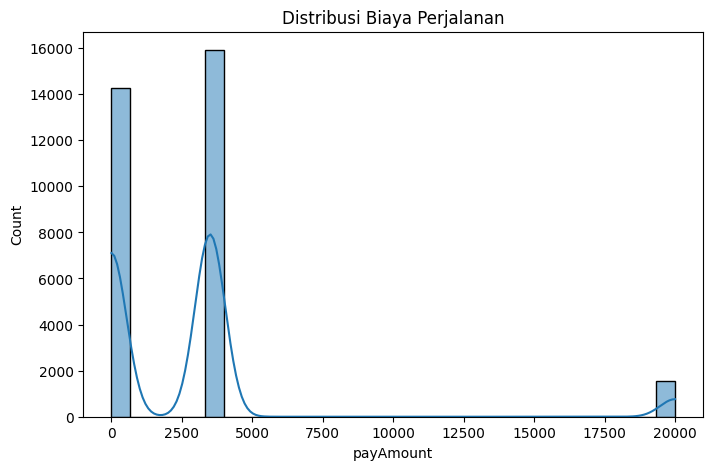

In [ ]:
#Distribusi Biaya
plt.figure(figsize=(8,5))
sns.histplot(df['payAmount'], bins=30, kde=True)
plt.title("Distribusi Biaya Perjalanan")
plt.show()

* Biaya Perjalanan bisa gratis bagi beberapa penumpang tertentu
* Untuk biaya transjakarta paling banyak berada di kisaran Rp3.000
* Ada perjalanan paling mahal yang menjulang tinggi sampai Rp20.000

In [ ]:
#Filter data: hanya ambil biaya >= 2000
df_filtered = df[df['payAmount'] >= 2000]

#Hitung rata-rata biaya perjalanan per pasangan halte
fare_routes = (
    df_filtered.groupby(['tapInStopsName', 'tapOutStopsName'])['payAmount']
    .mean()
    .reset_index()
)

#Ambil 5 termurah & 5 termahal
cheapest_routes = fare_routes.nsmallest(5, 'payAmount')
most_expensive_routes = fare_routes.nlargest(5, 'payAmount')

print("Top 5 Rute Termurah (>=2000):")
print(cheapest_routes)

print("\nTop 5 Rute Termahal:")
print(most_expensive_routes)

Top 5 Rute Termurah (>=2000):
   tapInStopsName      tapOutStopsName  payAmount
0  ACC Simatupang  Taman Lenteng Agung     3500.0
1    ACE Hardware     Term. Depok Baru     3500.0
2           ASEAN      Kejaksaan Agung     3500.0
3            ASMI                Monas     3500.0
4            ASMI          Pedongkelan     3500.0

Top 5 Rute Termahal:
       tapInStopsName   tapOutStopsName  payAmount
38   Ariobimo Sentral             Bulog    20000.0
62        BNI Syariah    GOR Sumantri 2    20000.0
63        BNI Syariah  Kuningan Madya 2    20000.0
64        BNI Syariah       Menara Duta    20000.0
114      Balai Kota 1   Flyover Karet 2    20000.0


/tmp/ipython-input-1845203541.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
/tmp/ipython-input-1845203541.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


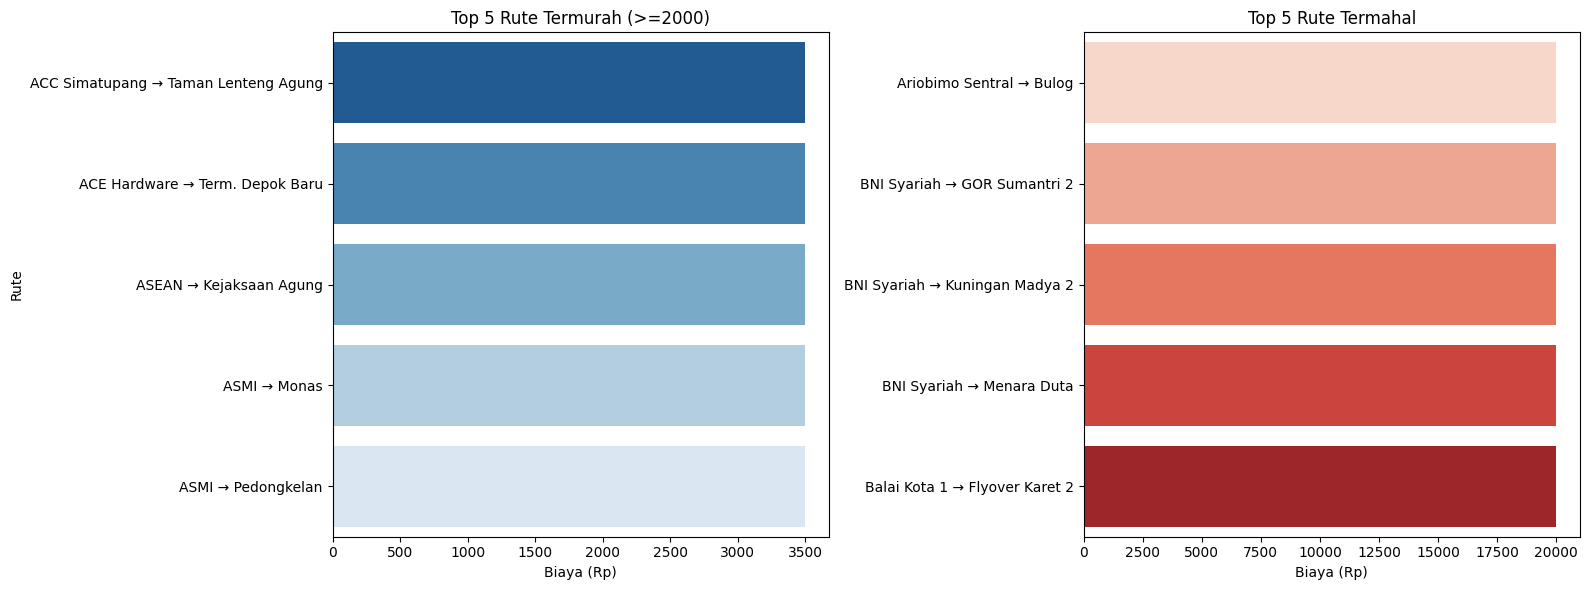

In [ ]:
#Visualisasi

#Bikin kolom rute: asal -> tujuan
cheapest_routes['rute'] = cheapest_routes['tapInStopsName'] + " → " + cheapest_routes['tapOutStopsName']
most_expensive_routes['rute'] = most_expensive_routes['tapInStopsName'] + " → " + most_expensive_routes['tapOutStopsName']

fig, axes = plt.subplots(1, 2, figsize=(16,6), sharey=False)

#Termurah
sns.barplot(
    data=cheapest_routes,
    x='payAmount', y='rute',
    palette="Blues_r", ax=axes[0]
)
axes[0].set_title("Top 5 Rute Termurah (>=2000)")
axes[0].set_xlabel("Biaya (Rp)")
axes[0].set_ylabel("Rute")

#Termahal
sns.barplot(
    data=most_expensive_routes,
    x='payAmount', y='rute',
    palette="Reds", ax=axes[1]
)
axes[1].set_title("Top 5 Rute Termahal")
axes[1].set_xlabel("Biaya (Rp)")
axes[1].set_ylabel("")

plt.tight_layout()
plt.show()


Dari visualisasi terlihat bahwa sebagian besar rute Transjakarta masih menggunakan tarif flat Rp3.500, yang menjadi andalan dan terjangkau bagi pengguna harian, namun terdapat juga sejumlah rute dengan tarif jauh lebih tinggi hingga Rp20.000

In [ ]:
#Mengambil data dengan biaya perjalanan gratis
df_free = df[df['payAmount'] == 0]
free_trip_count = len(df_free)
free_trip_percentage = (free_trip_count / len(df)) * 100

print(f"Jumlah perjalanan gratis: {free_trip_count}")
print(f"Persentase perjalanan gratis: {free_trip_percentage:.2f}%")

Jumlah perjalanan gratis: 14283
Persentase perjalanan gratis: 45.01%


* Untuk penerima benefit gratis biaya naik transjakarta perlu dikaji ulang, dikarenakan yang mendapatkan biaya gratis hampir setengahnya dari data transaksi elektronik Transjakarta ini

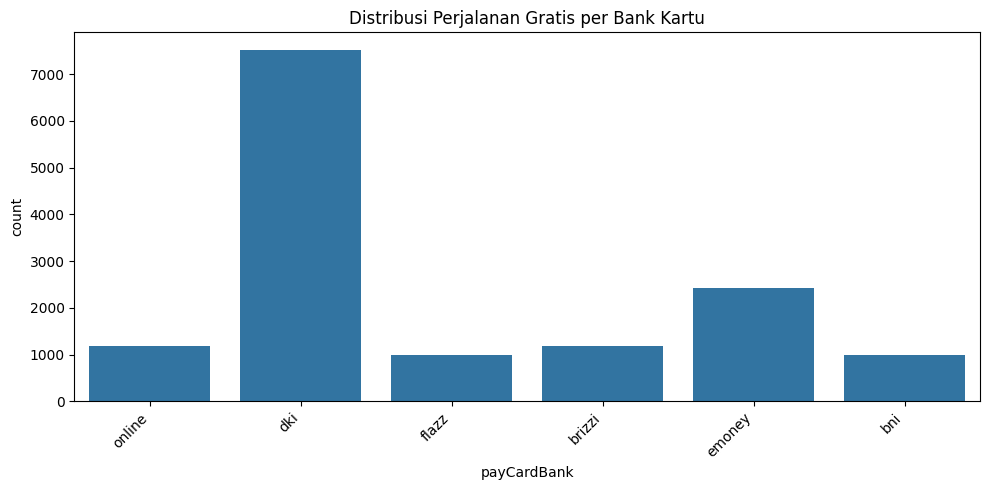

In [ ]:
#Distribusi Perjalanan Gratis per Bank Kartu
plt.figure(figsize=(10, 5))
sns.countplot(data=df_free, x='payCardBank')
plt.title("Distribusi Perjalanan Gratis per Bank Kartu")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

* Bank DKI mendominasi jumlah perjalanan gratis, jauh lebih tinggi dibanding bank lain.

* e-Money Mandiri juga cukup tinggi, diikuti oleh Brizzi, Flazz, BNI, dan Online.

* Hal ini menunjukkan Bank DKI punya kontribusi paling besar dalam pembayaran Transjakarta, kemungkinan karena program layanan Jakarta

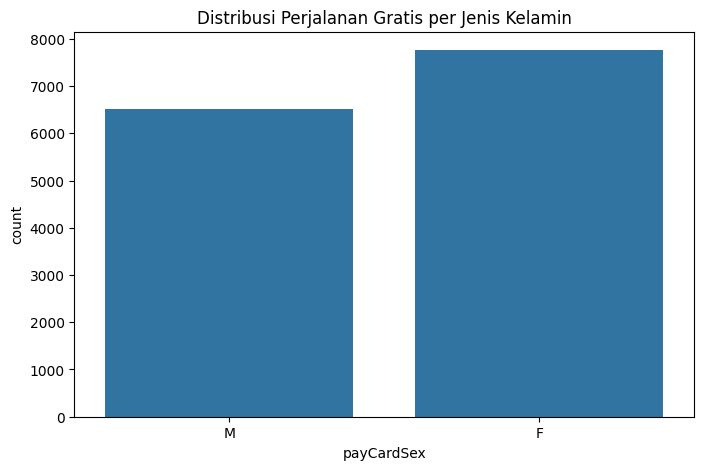

In [ ]:
#Distribusi Perjalanan Gratis per Jenis Kelamin
plt.figure(figsize=(8, 5))
sns.countplot(data=df_free, x='payCardSex')
plt.title("Distribusi Perjalanan Gratis per Jenis Kelamin")
plt.show()

* Perempuan lebih banyak menggunakan perjalanan gratis dibanding laki-laki.

* Ini bisa menjadi sinyal bahwa kelompok perempuan lebih memanfaatkan fasilitas ini, mungkin karena kebutuhan mobilitas harian yang tinggi atau faktor keamanan & kenyamanan

/tmp/ipython-input-2695626771.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_free['age_group'] = pd.cut(df_free['age'], bins=bins, labels=labels)


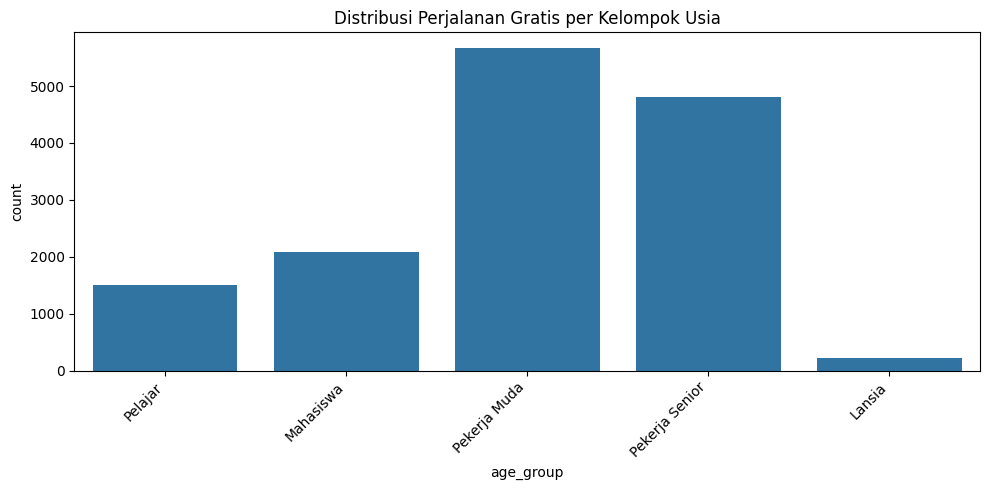

In [ ]:
bins = [0,18,25,40,60,100]
labels = ['Pelajar','Mahasiswa','Pekerja Muda','Pekerja Senior','Lansia']
df_free['age_group'] = pd.cut(df_free['age'], bins=bins, labels=labels)

plt.figure(figsize=(10, 5))
sns.countplot(data=df_free, x='age_group')
plt.title("Distribusi Perjalanan Gratis per Kelompok Usia")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

* Kelompok Pekerja Muda mendominasi, disusul oleh Pekerja Senior.

* Kelompok pelajar dan mahasiswa relatif lebih rendah, sementara lansia sangat sedikit.

* Artinya, mayoritas pengguna perjalanan gratis adalah kelompok usia produktif, yang menjadi backbone mobilitas pekerja harian.

In [ ]:
#ANOVA Biaya Antar Koridor
anova_cost = stats.f_oneway(*[group['payAmount'].dropna()
                              for name, group in df.groupby('corridorName')])
print("ANOVA Biaya Antar Koridor:", anova_cost)

ANOVA Biaya Antar Koridor: F_onewayResult(statistic=inf, pvalue=0.0)


/usr/local/lib/python3.12/dist-packages/scipy/stats/_axis_nan_policy.py:579: ConstantInputWarning: Each of the input arrays is constant; the F statistic is not defined or infinite
  res = hypotest_fun_out(*samples, **kwds)


##Integrasi Rute & Armada

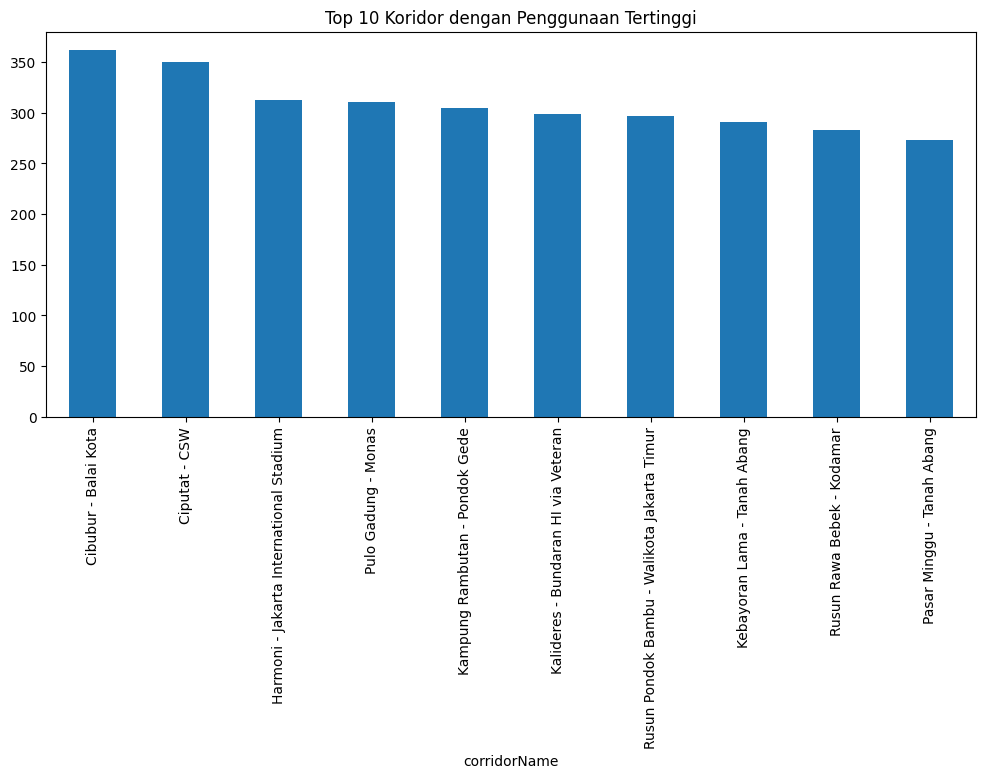

In [ ]:
#Kepadatan Perjalanan Antar Koridor
corridor_usage = df['corridorName'].value_counts().head(10)
corridor_usage.plot(kind='bar', figsize=(12,5), title="Top 10 Koridor dengan Penggunaan Tertinggi")
plt.show()

* Koridor "Cibubur-Balai Kota" merupakan koridor yang paling banyak digunakan
* Koridor "Harmoni - JIS", "Pulo Gading - Monas" dan beberapa koridor lainnya yang hampir setara mengindikasikan bahwa penumpang hampir sama banyak
* Bisa dijadikan prioritas dalam pengembangan, perbaikan, dan perawatan infrastruktur dan moda transportasi di koridor-koridor dengan tingkat penggunaan tertinggi.

In [ ]:
# Arah perjalanan Go (0) vs Back (1)
direction_usage = df['direction'].value_counts(normalize=True)*100
print("Distribusi arah perjalanan (Go=0, Back=1):")
print(direction_usage)

Distribusi arah perjalanan (Go=0, Back=1):
direction
1.0    50.050425
0.0    49.949575
Name: proportion, dtype: float64


Distribusi arah perjalanan hampir seimbang antara "Go" dan "Back". Menandakan bahwa pengguna transportasi ini melakukan perjalanan pergi dan pulang dengan frekuensi yang sangat mirip, dan membutuhkan moda transportasi dua arah yang seimbang

##Segmentasi

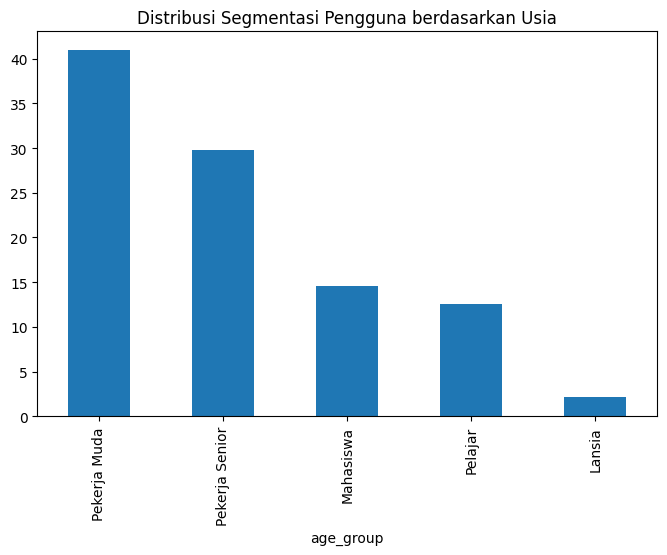

In [ ]:
# Segmentasi umur
bins = [0,18,25,40,60,100]
labels = ['Pelajar','Mahasiswa','Pekerja Muda','Pekerja Senior','Lansia']
df['age_group'] = pd.cut(df['age'], bins=bins, labels=labels)

age_usage = df['age_group'].value_counts(normalize=True)*100
age_usage.plot(kind='bar', figsize=(8,5), title="Distribusi Segmentasi Pengguna berdasarkan Usia")
plt.show()

* Pekerja Muda mendominasi pengguna Transjakarta, disusul oleh Pekerja Senior.

* Kelompok Mahasiswa dan Pelajar cukup signifikan tapi lebih rendah, sedangkan Lansia sangat kecil porsinya.

/tmp/ipython-input-3418754338.py:14: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_top10_stops.groupby(['tapInStopsName', 'age_group'])


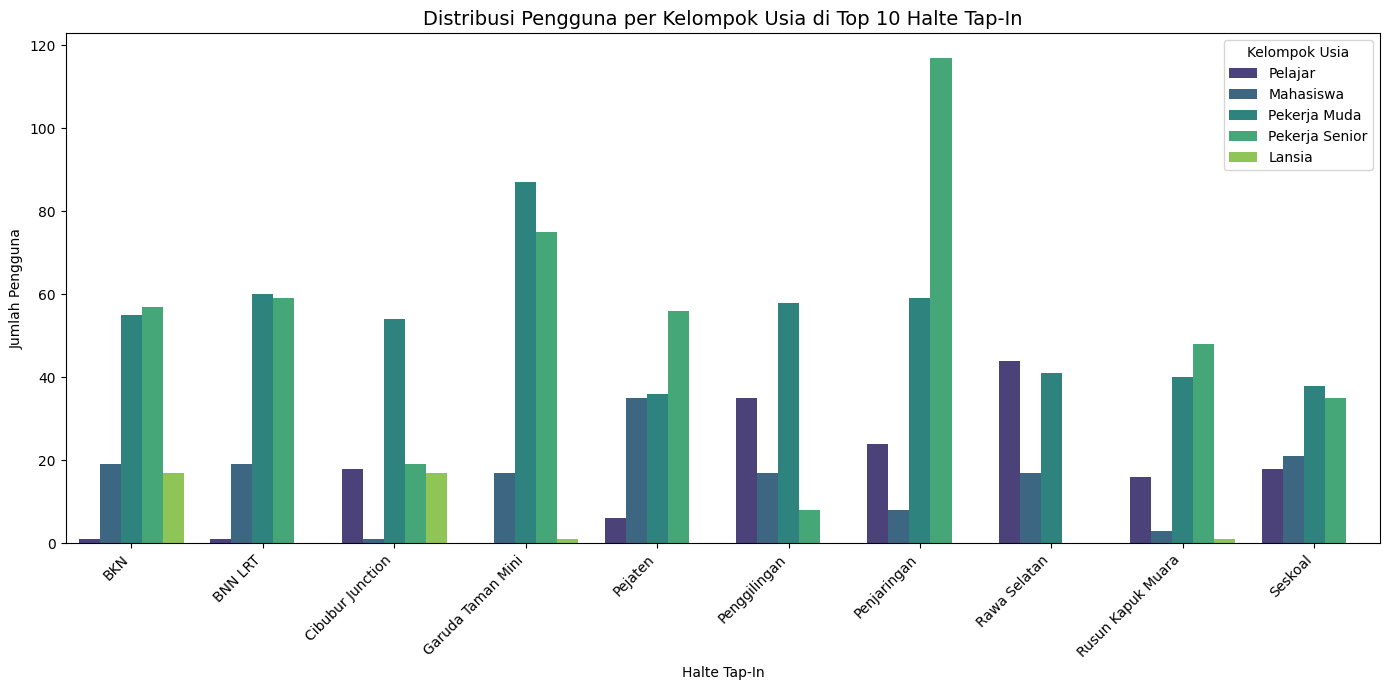

In [ ]:
#Ambil Top 10 Tap In Halte
top10_tapin_overall = df['tapInStopsName'].value_counts().head(10).index

#Filter data untuk Top 10 Tap In Halte
df_top10_stops = df[df['tapInStopsName'].isin(top10_tapin_overall)].copy()

#Bikin Ulang Binning
bins = [0, 18, 25, 40, 60, 100]
labels = ['Pelajar', 'Mahasiswa', 'Pekerja Muda', 'Pekerja Senior', 'Lansia']
df_top10_stops['age_group'] = pd.cut(df_top10_stops['age'], bins=bins, labels=labels)

#Kalkulasi masing-masing age group untuk setiap Tap-In
age_stop_counts = (
    df_top10_stops.groupby(['tapInStopsName', 'age_group'])
    .size()
    .reset_index(name='count')
)

#Distribusi Pengguna per Kelompok Usia
plt.figure(figsize=(14, 7))
sns.barplot(
    data=age_stop_counts,
    x='tapInStopsName',
    y='count',
    hue='age_group',
    palette='viridis'
)
plt.title("Distribusi Pengguna per Kelompok Usia di Top 10 Halte Tap-In", fontsize=14)
plt.xlabel("Halte Tap-In")
plt.ylabel("Jumlah Pengguna")
plt.xticks(rotation=45, ha="right")
plt.legend(title="Kelompok Usia")
plt.tight_layout()
plt.show()

* Di halte dengan volume tinggi (misalnya Garuda Taman Mini, Penjaringan, BKN, BNI LRT), dominasi tetap ada pada Pekerja Muda dan Pekerja Senior.

* Beberapa halte seperti Rawa Selatan dan Penggilingan justru terlihat lebih seimbang dengan kontribusi cukup besar dari pelajar/mahasiswa.

* Lansia sangat kecil kontribusinya di hampir semua halte, menunjukkan mobilitas mereka dengan TJ masih rendah.

/tmp/ipython-input-3658959281.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='age_group', y='duration_min', palette='viridis')


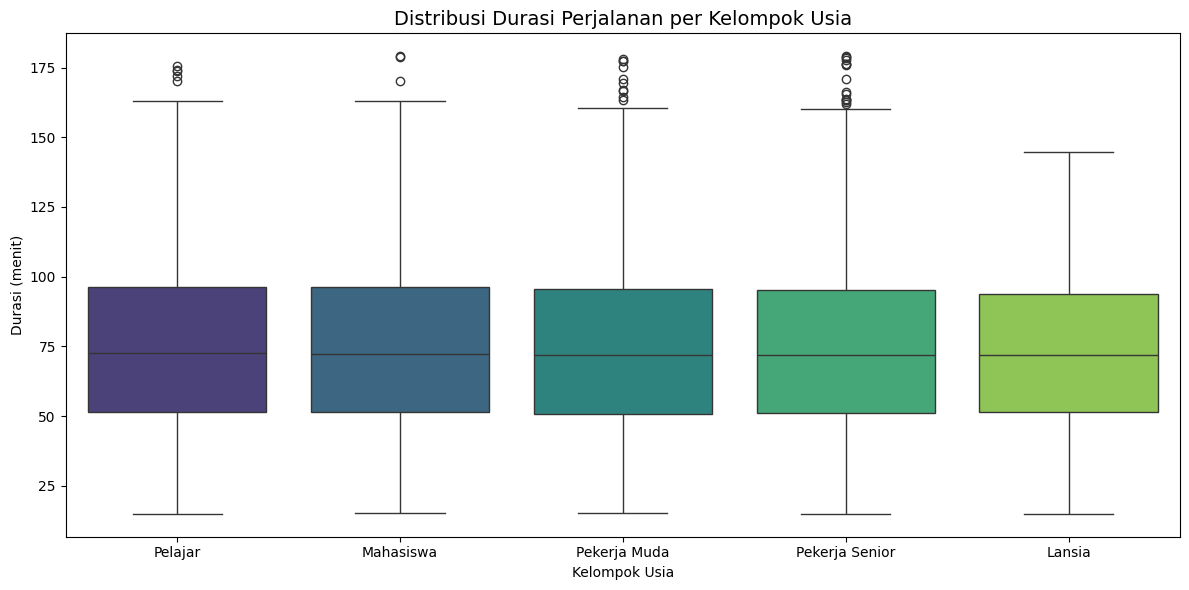


Rata-rata Durasi Perjalanan per Kelompok Usia:
        age_group  duration_min
0         Pelajar     72.526160
1       Mahasiswa     72.497301
2    Pekerja Muda     72.014270
3  Pekerja Senior     72.188114
4          Lansia     71.871190

Rata-rata Biaya Perjalanan per Kelompok Usia (Hanya Perjalanan Berbayar):
        age_group    payAmount
0         Pelajar  5304.374241
1       Mahasiswa  4247.047244
2    Pekerja Muda  5523.478971
3  Pekerja Senior  4371.994802
4          Lansia  3604.430380


/tmp/ipython-input-3658959281.py:16: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_duration_by_age = df.groupby('age_group')['duration_min'].mean().reset_index()
/tmp/ipython-input-3658959281.py:23: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_pay_by_age = df_paid.groupby('age_group')['payAmount'].mean().reset_index()


In [ ]:
#Bikin age group per Binning
bins = [0, 18, 25, 40, 60, 100]
labels = ['Pelajar', 'Mahasiswa', 'Pekerja Muda', 'Pekerja Senior', 'Lansia']
df['age_group'] = pd.cut(df['age'], bins=bins, labels=labels)

#Distribusi Durasi Perjalanan per Kelompok Usia
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='age_group', y='duration_min', palette='viridis')
plt.title("Distribusi Durasi Perjalanan per Kelompok Usia", fontsize=14)
plt.xlabel("Kelompok Usia")
plt.ylabel("Durasi (menit)")
plt.tight_layout()
plt.show()

#Kalkulasi rata-rata durasi perjalanan per age group
avg_duration_by_age = df.groupby('age_group')['duration_min'].mean().reset_index()
print("\nRata-rata Durasi Perjalanan per Kelompok Usia:")
print(avg_duration_by_age)

#Kalkulasi rata-rata biaya perjalanan per age group (yang tidak free)
df_paid = df[df['payAmount'] > 0].copy()
df_paid['age_group'] = pd.cut(df_paid['age'], bins=bins, labels=labels)
avg_pay_by_age = df_paid.groupby('age_group')['payAmount'].mean().reset_index()
print("\nRata-rata Biaya Perjalanan per Kelompok Usia (Hanya Perjalanan Berbayar):")
print(avg_pay_by_age)

* Median durasi perjalanan antar kelompok usia relatif mirip (sekitar 70–75 menit).

* Namun, Pelajar dan Mahasiswa punya variasi perjalanan lebih lebar, dengan cukup banyak outlier durasi panjang (lebih dari 150 menit).

* Lansia cenderung punya durasi perjalanan yang sedikit lebih rendah secara konsisten, walaupun jumlah pengguna kecil.

# Summary dan Insight

Berdasarkan analisis data transaksi elektronik Transjakarta yang telah dilakukan, berikut adalah rangkuman temuan utama dan insight yang dapat digunakan oleh pemangku kepentingan bisnis:

## Summary

1.  **Pola Waktu Perjalanan:**
    *   Terdapat dua puncak kepadatan perjalanan: pagi (jam 5-9) dan sore (jam 16-18), yang mencerminkan jam sibuk berangkat dan pulang kerja/sekolah.
    *   Durasi perjalanan pada hari kerja secara signifikan berbeda dibandingkan akhir pekan (berdasarkan hasil T-Test).
    *   Hari kerja (Senin-Jumat) memiliki volume perjalanan jauh lebih tinggi dibandingkan akhir pekan.

2.  **Pola Halte & Koridor:**
    *   Halte Tap-In dan Tap-Out terpopuler terkonsentrasi di area pinggiran kota yang terhubung ke pusat kota, menunjukkan tingginya pergerakan komuter.
    *   Terdapat perbedaan durasi perjalanan yang signifikan antar koridor (berdasarkan hasil ANOVA).
    *   Koridor "Cibubur - Balai Kota" menunjukkan lonjakan durasi perjalanan yang sangat tinggi pada jam tertentu (sekitar jam 10 pagi), mengindikasikan potensi masalah kepadatan atau rute yang kurang efisien pada jam tersebut.
    *   Rute antar halte populer dengan durasi terlama perlu dikaji lebih lanjut untuk efisiensi.

3.  **Karakteristik Penumpang:**
    *   Pengguna Transjakarta didominasi oleh perempuan.
    *   Terdapat hubungan yang signifikan antara jenis kelamin dan penggunaan halte populer (berdasarkan hasil Chi-Square), dengan beberapa halte didominasi pria dan halte Penjaringan didominasi perempuan.
    *   Mayoritas pengguna Transjakarta adalah kelompok usia produktif (Pekerja Muda dan Pekerja Senior).
    *   Median durasi perjalanan antar kelompok usia relatif mirip, namun pelajar/mahasiswa memiliki variasi durasi perjalanan yang lebih lebar.

4.  **Aspek Finansial & Efisiensi Biaya:**
    *   Sebagian besar perjalanan menggunakan tarif flat Rp3.500, namun ada rute dengan tarif jauh lebih tinggi.
    *   Proporsi perjalanan gratis cukup tinggi (sekitar 45%), didominasi oleh pengguna kartu Bank DKI dan perempuan dari kelompok usia produktif.
    *   Terdapat perbedaan biaya perjalanan yang signifikan antar koridor (berdasarkan hasil ANOVA).

5.  **Integrasi Rute & Armada:**
    *   Koridor "Cibubur - Balai Kota" adalah koridor dengan penggunaan tertinggi, berpotensi mengalami kepadatan.
    *   Distribusi arah perjalanan (Go vs Back) hampir seimbang.

## Insight untuk Pemangku Kepentingan Bisnis

1.  **Optimalisasi Jadwal dan Armada:**
    *   Fokuskan penambahan armada dan pengaturan jadwal yang lebih ketat pada jam sibuk (pagi dan sore) di koridor dan rute dengan durasi perjalanan terlama dan penggunaan tertinggi (misalnya, Cibubur - Balai Kota).
    *   Pertimbangkan penyesuaian jadwal atau rute alternatif untuk mengurangi durasi perjalanan yang sangat panjang pada jam tertentu di koridor yang teridentifikasi.

2.  **Peningkatan Layanan di Halte Populer:**
    *   Mengingat tingginya penggunaan halte-halte tertentu, perlu dipastikan fasilitas di halte tersebut memadai (kapasitas, kenyamanan, keamanan), terutama di halte yang didominasi oleh kelompok rentan seperti perempuan (contoh: Penjaringan).
    *   Evaluasi kebutuhan bus khusus perempuan pada rute-rute yang sering digunakan oleh penumpang perempuan dari halte dominan perempuan.

3.  **Evaluasi Program Perjalanan Gratis:**
    *   Proporsi perjalanan gratis yang tinggi perlu dikaji ulang dampaknya terhadap pendapatan Transjakarta.
    *   Analisis lebih mendalam diperlukan untuk memahami alasan di balik dominasi Bank DKI, perempuan, dan kelompok usia produktif dalam penggunaan perjalanan gratis, serta implikasinya terhadap kebijakan subsidi.

4.  **Analisis Rute Berbiaya Tinggi:**
    *   Rute dengan tarif Rp20.000 perlu dianalisis lebih lanjut. Apakah tarif ini mencerminkan rute khusus, layanan premium, atau ada faktor lain? Komunikasi yang jelas mengenai struktur tarif ini penting bagi penumpang.

5.  **Strategi Pengembangan Koridor:**
    *   Koridor dengan penggunaan tertinggi harus menjadi prioritas utama dalam pengembangan infrastruktur dan peningkatan kualitas layanan.
    *   Keseimbangan arah perjalanan menunjukkan bahwa kebutuhan layanan di kedua arah sama pentingnya.

6.  **Segmentasi Pengguna untuk Layanan yang Lebih Baik:**
    *   Meskipun durasi perjalanan median mirip, variasi yang lebih lebar pada pelajar/mahasiswa mungkin mengindikasikan kebutuhan akan fleksibilitas rute atau jadwal.
    *   Data demografi dapat digunakan untuk merancang layanan atau fasilitas yang lebih sesuai dengan kebutuhan kelompok pengguna utama (pekerja muda/senior) dan kelompok minoritas (lansia).

Dengan memanfaatkan insight dari analisis ini, Transjakarta dapat membuat keputusan yang lebih tepat untuk meningkatkan efisiensi operasional, mengoptimalkan biaya, dan pada akhirnya meningkatkan kualitas layanan bagi seluruh penumpang.